In [160]:
#Konrad Szwed projekt 0.1

#Bibliografia:
#https://dzone.com/articles/image-data-analysis-using-numpy-amp-opencv


In [30]:
import glob
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import csv

In [31]:
#ŚCIEŻKI DOSTĘPU
#WPISZ SCIEZKE DO FOLDERU W KTORYM ZBADAMY PLIKI GRAFICZNE (zostaw to r''' i ''' na końcu)
#domyślnie: \Users\rooni\Desktop\projekt_analiza_obrazu\baza
#########################################################################
#user_path=r'''C:\Users\rooni\Desktop\PHOTOSHOP'''
user_path=r'''D:\Lelz'''

#########################################################################
#stats_path=r'''C:\Users\rooni\Desktop\projekt_analiza_obrazu\stats'''
stats_path=r'''C:\Users\KSzwed\repositories\projekt_analiza_obrazu\stats'''

In [32]:
#pobieranie stricte obrazow z folderu
path, dirs, files = next(os.walk(user_path))

print("W folderze jest :", len(files) ,"plikow")
files = [ fi for fi in files if fi.endswith(".jpg") ]
file_count = len(files)
print("W tym :", len(files) ,"plików jpg")

W folderze jest : 330 plikow
W tym : 110 plików jpg


In [46]:
#test konkretnego pliku
get_ipython().run_line_magic('matplotlib', 'inline')

def test_img(file):
    pic = imageio.imread(file)
    plt.figure(figsize = (15,15))
    plt.imshow(pic)

    print('Type of the image: ' , type(pic))
    print('Shape of the image: {}'.format(pic.shape))
    print(f'Image Hight: {pic.shape[0]} pixels')
    print(f'Image Width: {pic.shape[1]} pixels')
    print('Dimension of Image: {}'.format(pic.ndim))
    print('Image size: {}'.format(pic.size))
    print('Maximum RGB value in this image: {}'.format(pic.max()))
    print('Minimum RGB value in this image: {}'.format(pic.min()))
    try:
        print('Value of only R channel: {}'.format(pic[ 100, 50, 0]))
        print('Value of only G channel: {}'.format(pic[ 100, 50, 1]))
        print('Value of only B channel: {}'.format(pic[ 100, 50, 2]))
    except IndexError:
        print("RGB canals error")

In [52]:
def imgstats(file):
    pic = imageio.imread(file)
    img_stats=[]
    global i
    img_stats.append(i)
    img_stats.append(file)
    img_stats.append(type(pic))
    img_stats.append(pic.shape[0])
    img_stats.append(pic.shape[1])
    img_stats.append(pic.ndim)
    img_stats.append(pic.size)
    img_stats.append(pic.max())
    img_stats.append(pic.min())
    try:
        img_stats.append(pic[100, 50, 0])
        img_stats.append(pic[ 100, 50, 1])
        img_stats.append(pic[ 100, 50, 2])
    except IndexError:
        img_stats.append(0)
        img_stats.append(0)
        img_stats.append(0)
    return img_stats

In [53]:
Titles=['Index','File name','Type of the image','Image Height','Image Width','Dimension of Image','Image size','Maximum RGB','Minimum RGB','R channel','G channel','B channel','Baza wygenerowana przez Konrad Szwed dnia {} | Zawiera {} elementow'.format(datetime.datetime.today(),file_count)]

In [59]:
#test w razie problemow z konkretnym plikiem
#file=user_path+'\{}'.format(files[10])
#test_img(file)

In [61]:
#Sprawdzenie poprzedniego pliku ze statystykami
#path_oldstat='./stats/'
path_oldstat=stats_path
if os.path.isfile(path_oldstat+'stats.csv') :
    if os.path.isfile(path_oldstat+'old_stats.csv') :    
        os.unlink(path_oldstat+'old_stats.csv')
    os.rename(path_oldstat+'stats.csv', path_oldstat+'old_stats.csv')
    print('Utworzono backup poprzedniej bazy danych w folderze {},pod nazwą {}'.format(path_oldstat, os.listdir(path_oldstat)))
    
#Tworzenie csv
with open(stats_path+'\stats.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar=' ', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(Titles)
    #file_count ale do testow ustawcie mniejsza liczbe
    for i in range(file_count):
        file=user_path+'\{}'.format(files[i])
        filewriter.writerow(imgstats(file))
        
#print(imgstats('baza\{}'.format(files[0])))

In [75]:
def srednia(stats):
    return('Image Height:{:.2f}\n Image Width:{:.2f}\n Dimension of Image:{:.2f}\n Image size:{:.2f}Mb\n Maximum RGB:{:.2f}\n Minimum RGB:{:.2f}\n R channel:{:.2f}\n G channel:{:.2f}\n B channel:{:.2f}'.format(stats[0],stats[1],stats[2],stats[3]*pow(10,-6),stats[4],stats[5],stats[6],stats[7],stats[8]))

In [76]:
#Statystyki uśrednione
stats=[]
for i in range(9):
    stats.append(0)
for i in range(file_count):
    file=user_path+'\{}'.format(files[i])
    stats2=imgstats(file)  
    for n in range(9):
        stats[n]+=stats2[n+3]
        
for i in range(9):
    stats[i]=stats[i]/file_count
    
print("Wyniki średnie:")    
print(srednia(stats))


Wyniki średnie:
Image Height:1326.48
 Image Width:845.14
 Dimension of Image:2.99
 Image size:4.62Mb
 Maximum RGB:254.63
 Minimum RGB:0.26
 R channel:133.34
 G channel:128.09
 B channel:123.37


wykres średnia z RGB channels


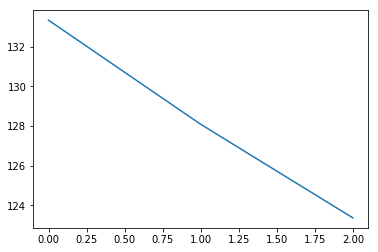

In [81]:
#wykresy
print("wykres średnia z RGB channels")
y = [stats[6],stats[7],stats[8]]
plt.plot(y)
plt.show()


In [64]:
input()

elo


'elo'